In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.decomposition import PCA, FactorAnalysis
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
EGA_FILE_PATH = "EGA3.csv"
CONTROL_FILE_PATH= "control.csv"

In [12]:
def perform_pca(df, n_components=2):
  # Standardize the data
  scaler = StandardScaler()
  df_scaled = scaler.fit_transform(df)

  print('Standardized dataset: ', df_scaled)

  # Apply PCA
  pca = PCA(n_components=n_components)
  principal_components = pca.fit_transform(df_scaled)

  #Explained variance tells you how much of the data's variabilityis captured by each Principal Component
  explained_variance = pca.explained_variance_ratio_
  return pca, principal_components, explained_variance

In [4]:
def perform_factor_analysis(df, n_components = 2):
  # Standardize the data.
  scaler = StandardScaler()
  df_scaled = scaler.fit_transform(df)
  # Apply factor analysis
  fa = FactorAnalysis(n_components=n_components)
  factors = fa.fit_transform(df_scaled)

  # factors loadings: how strongly each variable co relates with the factors
  factor_loadings = fa.components_.T
  return fa, factors, factor_loadings

In [5]:
# Load the data
ega = pd.read_csv(EGA_FILE_PATH)
control = pd.read_csv(CONTROL_FILE_PATH)



# **Calculation for EGA3**



In [38]:
# PCA for EGA3
pca_model_ega, pcs_ega, exp_var_ega = perform_pca(ega)
# Print Explained variance by PC
print("\n\nEGA: explained variance by PC1 and PC2:", exp_var_ega)
# Print Eigen values and Eigen vectors for EGA3
print("\nEGA: Eigen values: \n", pca_model_ega.explained_variance_)
print("\nEGA: Eigen vectors: \n", pca_model_ega.components_)


Standardized dataset:  [[-0.79580087  0.21162318 -1.05332743  0.50800051  0.32576926 -0.98058068
   1.37348037 -1.08428451  1.38032766  1.10762677  1.19375038  0.03688219]
 [-0.61453511 -1.31676647 -0.29057308 -1.3970014  -1.35469241 -0.39223227
  -0.3949119  -0.24414353 -0.95666273  0.20768002 -1.25354864  1.2058872 ]
 [ 1.41033598  1.10514329  1.34390052  0.88900089  1.02892316  1.37281295
  -0.97856847  1.32842804 -0.42366492 -1.31530679  0.05979826 -1.24276939]]


EGA: explained variance by PC1 and PC2: [0.62245686 0.37754314]

EGA: Eigen values: 
 [11.20422343  6.79577657]

EGA: Eigen vectors: 
 [[ 0.36567017  0.2767802   0.35189228  0.21870091  0.25618665  0.35834793
  -0.26331953  0.34834437 -0.12318374 -0.34530159  0.00116043 -0.31446019]
 [-0.01641398  0.30728262 -0.1287219   0.37665326  0.33543741 -0.0949206
   0.3262037  -0.14375441  0.44238841  0.15538693  0.46981178 -0.24019346]]


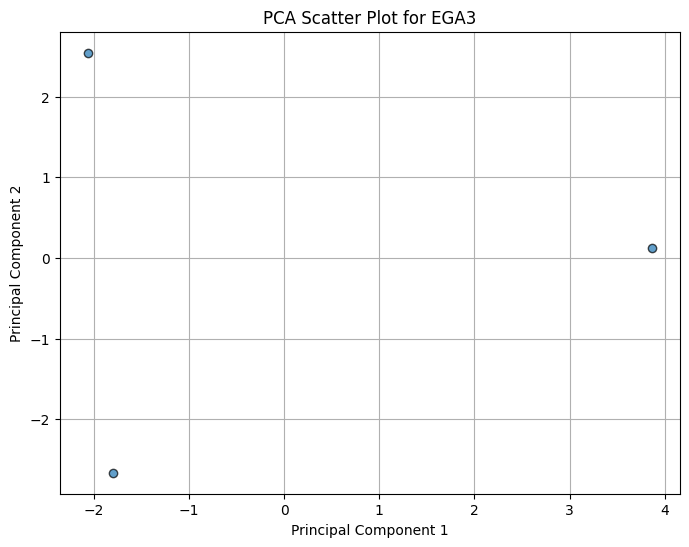

In [8]:
# Scatter plot for the first two primcipal components
plt.figure(figsize=(8, 6))
plt.scatter(pcs_ega[:, 0], pcs_ega[:, 1], alpha=0.7, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot for EGA3')
plt.grid(True)
plt.show()

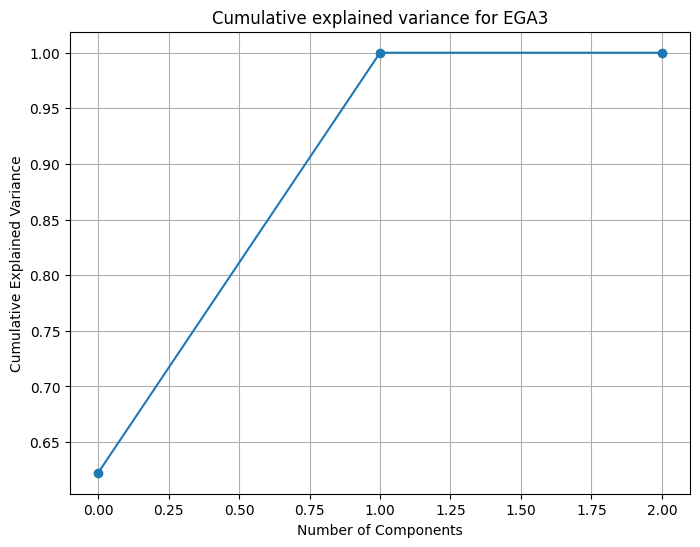

In [15]:
# EGA3: Scree Plot
pca_full_ega = PCA()
pca_full_ega.fit(StandardScaler().fit_transform(ega))
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full_ega.explained_variance_ratio_) , marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative explained variance for EGA3')
plt.grid(True)
plt.show()

EGA3: Factor loadings:
 [[ 0.99938951  0.03493717]
 [ 0.75645007 -0.65405145]
 [ 0.96173404  0.27398472]
 [ 0.59771731 -0.80170694]
 [ 0.70016716 -0.71397895]
 [ 0.97937756  0.20203861]
 [-0.71966158 -0.694325  ]
 [ 0.95203748  0.30598145]
 [-0.33666551 -0.94162431]
 [-0.94372147 -0.33074128]
 [ 0.0031715  -0.99999497]
 [-0.85943081  0.51125208]]


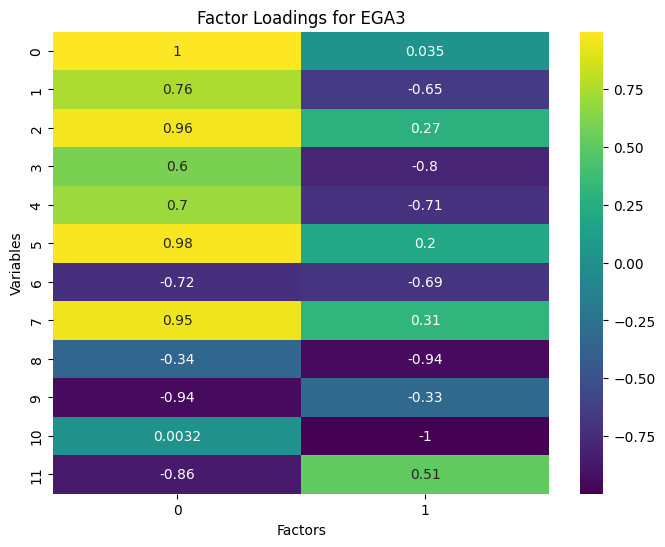

EGA3: Factor loadings 


,PC1,PC2
WUE,0.999390,0.034937
NUE,0.756450,-0.654051
E/H Ratio (FW),0.961734,0.273985
E/H Ratio (DW),0.597717,-0.801707
NMC,0.700167,-0.713979
Yield,0.979378,0.202039
DMA,-0.719662,-0.694325
PFP,0.952037,0.305981
RE,-0.336666,-0.941624
AE,-0.943721,-0.330741


from matplotlib import pyplot as plt
pc_table['PC1'].plot(kind='hist', bins=20, title='PC1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pc_table['PC2'].plot(kind='hist', bins=20, title='PC2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pc_table.plot(kind='scatter', x='PC1', y='PC2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
pc_table['PC1'].plot(kind='line', figsize=(8, 4), title='PC1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
pc_table['PC2'].plot(kind='line', figsize=(8, 4), title='PC2')
plt.gca().spines[['top', 'right']].set_visible(False)

In [22]:
# EGA3: Factor analysis
fa_model_ega, factors_ega, loadings_ega = perform_factor_analysis(ega)
print("EGA3: Factor loadings:\n", loadings_ega)

# Heatmap to visualize factor loadings.
plt.figure(figsize=(8,6))
sns.heatmap(loadings_ega, annot=True, cmap='viridis')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.title('Factor Loadings for EGA3')
plt.show()

# Table to show factor loadings with principal component and factor names
pc_table = pd.DataFrame(loadings_ega, columns=['PC1', 'PC2'])
pc_table.index = ega.columns  # Set row headings as feature names

print("EGA3: Factor loadings ")
# Display the table
display(pc_table)

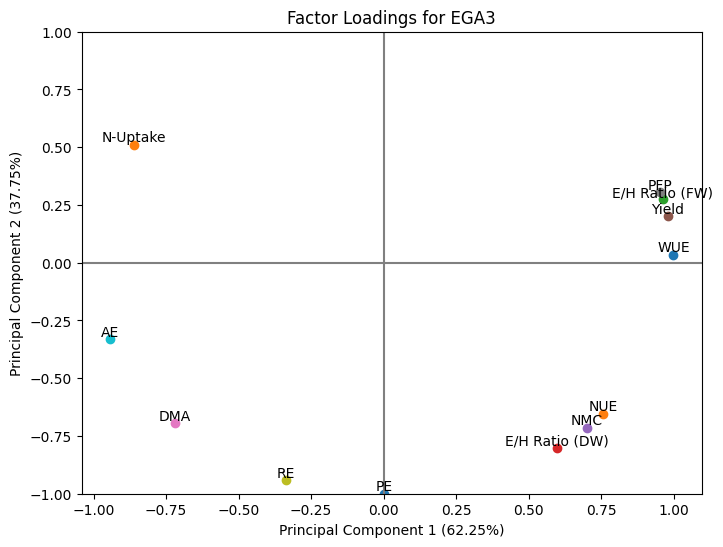

In [30]:
# EGA3: Graph of Principal compoenents and factors loadings.
plt.figure(figsize=(8, 6))

# Scatter plot for factor loadings
for i, factor in enumerate(ega.columns):
    plt.scatter(loadings_ega[i, 0], loadings_ega[i, 1], label=factor)
    # Add label to each point
    plt.text(loadings_ega[i, 0], loadings_ega[i, 1], factor, ha='center', va='bottom')

# Add labels and title
plt.xlabel(f'Principal Component 1 ({exp_var_ega[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({exp_var_ega[1]*100:.2f}%)')
plt.title('Factor Loadings for EGA3')

# Set y-axis limits
plt.ylim(-1, 1)

# Add origin grids
plt.axhline(0, color='gray', linestyle='-')  # Horizontal line at y=0
plt.axvline(0, color='gray', linestyle='-')  # Vertical line at x=0
# plt.legend(loc='best', bbox_to_anchor=(1.05, 1))  # Adjust legend location

# Show the plot
plt.show()

# **Calculation for Control**

In [40]:
# PCA for EGA3
pca_model_control, pcs_control, exp_var_control = perform_pca(control)
print("\nControl: explained variance by PC1 and PC2:", exp_var_control)
# Print Eigen values and Eigen vectors for EGA3
print("\nControl: Eigen values: \n", pca_model_control.explained_variance_)
print("\nControl: Eigen vectors: \n", pca_model_control.components_)

Standardized dataset:  [[-1.03998136 -1.28407671  0.46523319  1.41250675  0.96456195  0.46291005
  -1.37528438 -1.06904497  0.9258201   1.29702553 -0.34633949  0.97096663]
 [-0.30996659  0.12885199  0.92395963 -0.76640745 -1.37794564  0.9258201
   0.40225709 -0.26726124 -1.38873015 -0.16035952 -1.01427993  0.40497603]
 [ 1.34994795  1.15522472 -1.38919282 -0.6460993   0.41338369 -1.38873015
   0.97302729  1.33630621  0.46291005 -1.13666601  1.36061941 -1.37594266]]

Control: explained variance by PC1 and PC2: [0.69234721 0.30765279]

Control: Eigen values: 
 [12.46224973  5.53775027]

Control: Eigen vectors: 
 [[ 0.34668636  0.3339555  -0.29954243 -0.25245097 -0.01519295 -0.29923758
   0.30906773  0.346926   -0.0024183  -0.33176644  0.28304079 -0.34494021]
 [ 0.01967787 -0.14102287 -0.26257936  0.35699533  0.51995064 -0.26336039
  -0.23643562  0.00362778  0.52043728  0.15220704  0.30096922 -0.05572262]]


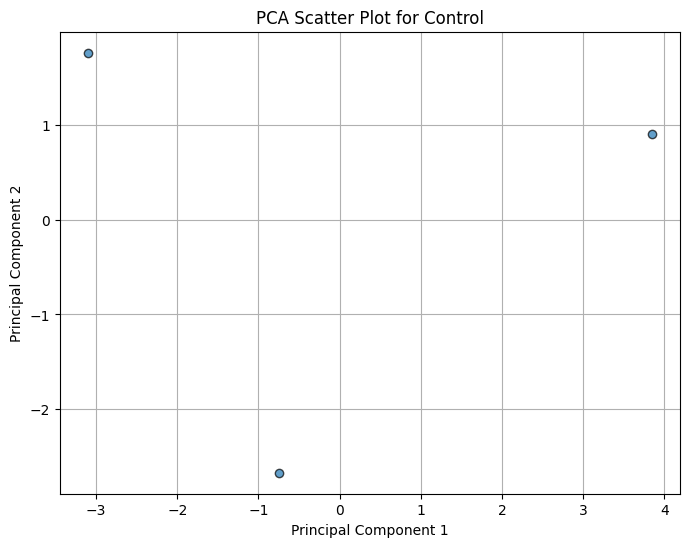

In [33]:
# Scatter plot for the first two primcipal components
plt.figure(figsize=(8, 6))
plt.scatter(pcs_control[:, 0], pcs_control[:, 1], alpha=0.7, edgecolor='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Scatter Plot for Control')
plt.grid(True)
plt.show()

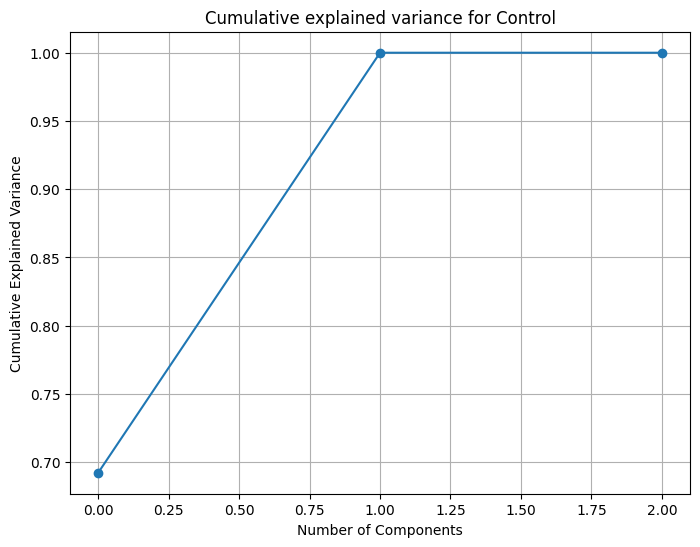

In [34]:
# Control: Scree Plot
pca_full_control = PCA()
pca_full_control.fit(StandardScaler().fit_transform(control))
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(pca_full_control.explained_variance_ratio_) , marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative explained variance for Control')
plt.grid(True)
plt.show()

Control: Factor loadings:
 [[ 0.99928497 -0.03780934]
 [ 0.96258966  0.27096338]
 [-0.8633978   0.50452377]
 [-0.72766189 -0.68593598]
 [-0.043792   -0.99904067]
 [-0.86251913  0.50602446]
 [ 0.89085344  0.45429082]
 [ 0.99997571 -0.00697048]
 [-0.00697048 -0.99997571]
 [-0.95627996 -0.2924528 ]
 [ 0.81583368 -0.57828662]
 [-0.99425189  0.10706624]]


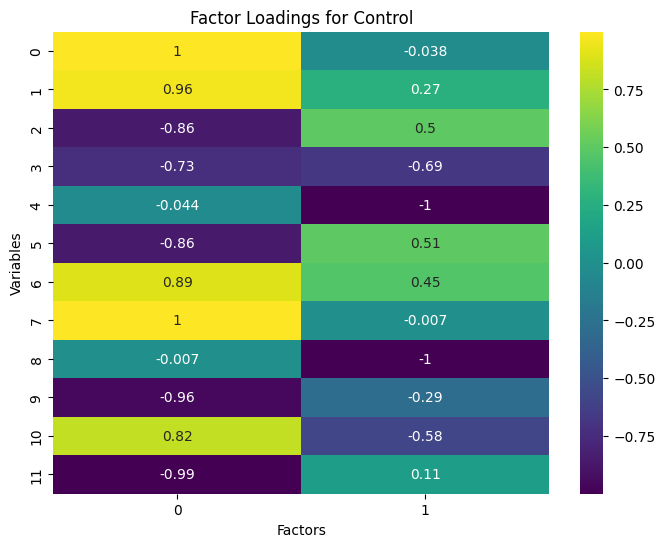

Control: Factor loadings 


,PC1,PC2
WUE,0.999285,-0.037809
NUE,0.962590,0.270963
E/H Ratio (FW),-0.863398,0.504524
E/H Ratio (DW),-0.727662,-0.685936
NMC,-0.043792,-0.999041
Yield,-0.862519,0.506024
DMA,0.890853,0.454291
PFP,0.999976,-0.006970
RE,-0.006970,-0.999976
AE,-0.956280,-0.292453


In [35]:
# EGA3: Factor analysis
fa_model_control, factors_control, loadings_control = perform_factor_analysis(control)
print("Control: Factor loadings:\n", loadings_control)

# Heatmap to visualize factor loadings.
plt.figure(figsize=(8,6))
sns.heatmap(loadings_control, annot=True, cmap='viridis')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.title('Factor Loadings for Control')
plt.show()

# Table to show factor loadings with principal component and factor names
pc_table_control = pd.DataFrame(loadings_control, columns=['PC1', 'PC2'])
pc_table_control.index = control.columns  # Set row headings as feature names

print("Control: Factor loadings ")
# Display the table
display(pc_table_control)

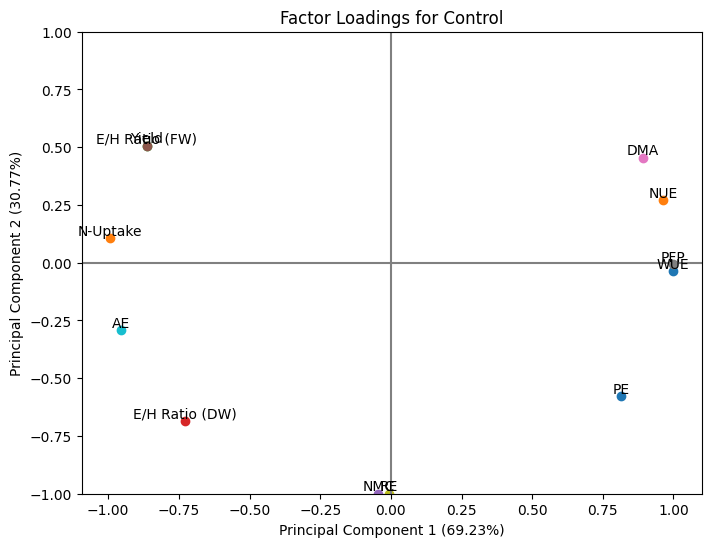

In [36]:
# Control: Graph of Principal compoenents and factors loadings.
plt.figure(figsize=(8, 6))

# Scatter plot for factor loadings
for i, factor in enumerate(control.columns):
    plt.scatter(loadings_control[i, 0], loadings_control[i, 1], label=factor)
    # Add label to each point
    plt.text(loadings_control[i, 0], loadings_control[i, 1], factor, ha='center', va='bottom')

# Add labels and title
plt.xlabel(f'Principal Component 1 ({exp_var_control[0]*100:.2f}%)')
plt.ylabel(f'Principal Component 2 ({exp_var_control[1]*100:.2f}%)')
plt.title('Factor Loadings for Control')

# Set y-axis limits
plt.ylim(-1, 1)

# Add origin grids
plt.axhline(0, color='gray', linestyle='-')  # Horizontal line at y=0
plt.axvline(0, color='gray', linestyle='-')  # Vertical line at x=0
# plt.legend(loc='best', bbox_to_anchor=(1.05, 1))  # Adjust legend location

# Show the plot
plt.show()

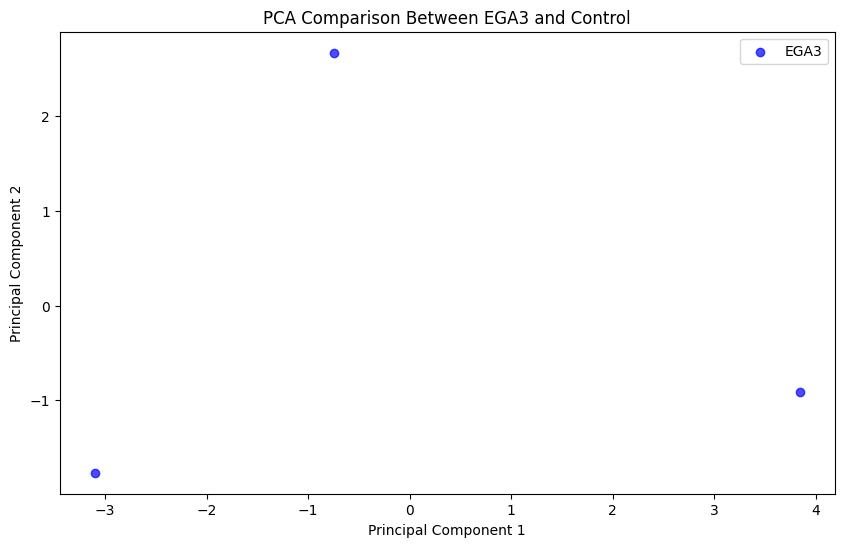

In [ ]:
# # Step 5: Visualize the results
# plt.figure(figsize=(10, 6))

# # Scatter plot for EGA3
# plt.scatter(pca_ega[:, 0], pca_ega[:, 1], color='blue', label='EGA3', alpha=0.7)

# # # Scatter plot for Control
# # plt.scatter(pca_control[:, 0], pca_control[:, 1], color='red', label='Control', alpha=0.7)

# # Add labels and title
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.title('PCA Comparison Between EGA3 and Control')
# plt.legend()

# # Show the plot
# plt.show()